In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('final_dataset.csv')

In [2]:
#df3=df2[['Time_Segment', 'Holiday', 'Vacation_week', 'Weekend Return','Season', 'Exceeds Threshold']].head(10)
#df3

In [3]:
import lightgbm as lgb
mapeo = {'Yes': 1, 'No': 0}
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
X = df[['Time_Segment', 'Holiday', 'Vacation_week', 'Weekend Return', 'Season']]
y=df['Exceeds Threshold']

# Convert categorical variables to numerical format using one-hot encoding
X = pd.get_dummies(X, columns=['Time_Segment', 'Season'])



Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

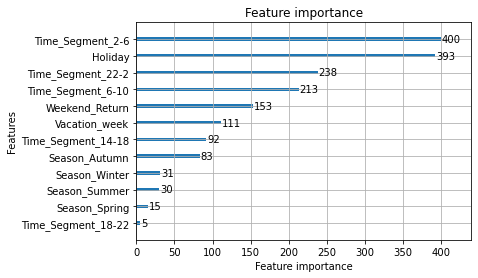

In [4]:
# Manually split the dataset (80% train, 20% test)
split_index = int(len(df) * 0.85)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the grid of hyperparameters to search
param_grid = {
    'num_leaves': [31, 62, 127],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 400]
}

    # Initialize the LightGBM model
model = lgb.LGBMClassifier()

    # Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit GridSearchCV
grid_search.fit(X_train, y_train)

    # Extract the best model
best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Best Model Parameters:", grid_search.best_params_)
print("Test Set Accuracy:", test_accuracy)

    # Optionally, plot feature importances (requires matplotlib)
lgb.plot_importance(best_model)
plt.show()


Test Set Accuracy: 0.8127853881278538
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       326
           1       0.77      0.89      0.83       331

    accuracy                           0.81       657
   macro avg       0.82      0.81      0.81       657
weighted avg       0.82      0.81      0.81       657

Confusion Matrix:
[[238  88]
 [ 35 296]]


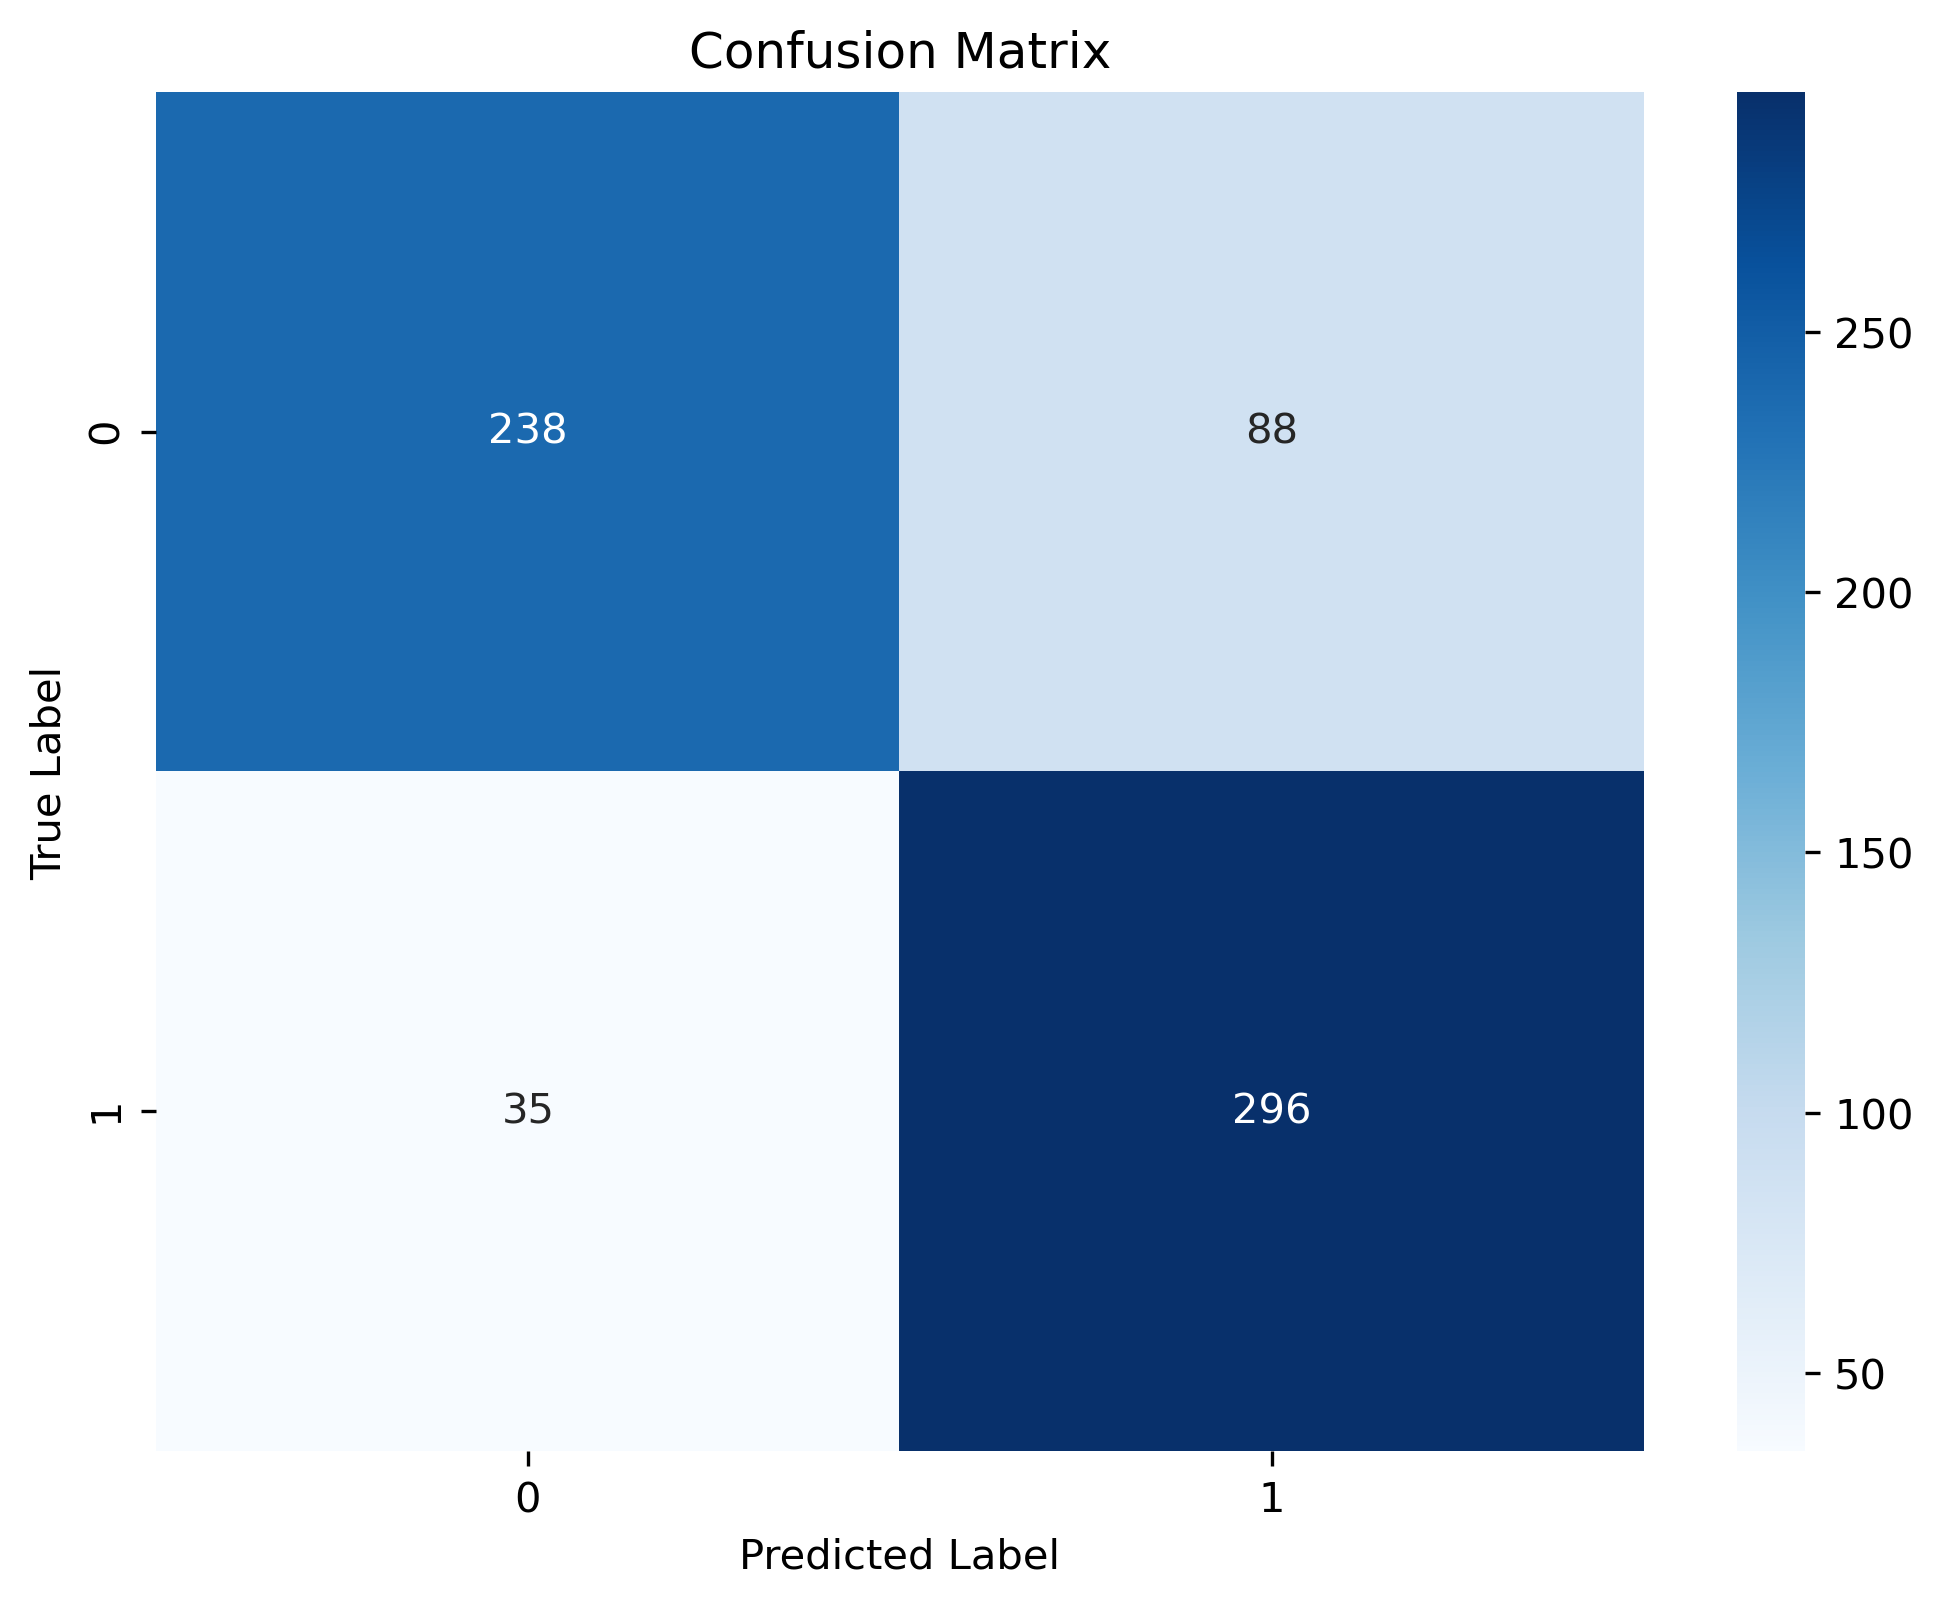

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [6]:
import pandas as pd

# Get predictions for the test set using the best model
y_pred = best_model.predict(X_test)

# Create a DataFrame containing test set features and predicted labels
predictions_df = pd.DataFrame(X_test, columns=X.columns)  # Assuming X is your feature matrix
predictions_df['True Label'] = y_test
predictions_df['Predicted Label'] = y_pred

# Display the DataFrame
predictions_df


,Holiday,Vacation_week,Weekend Return,Time_Segment_10-14,Time_Segment_14-18,Time_Segment_18-22,Time_Segment_2-6,Time_Segment_22-2,Time_Segment_6-10,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,True Label,Predicted Label
3723,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
3724,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3725,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3726,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3727,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4376,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1
4377,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1
4378,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1
